#### IMPORT Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Project/Dataset/sepsis.csv")

In [3]:
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,1,0
1,97.0,95.0,0.0,98.0,75.33,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,2,0
2,89.0,99.0,0.0,122.0,86.00,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,3,0
3,90.0,95.0,0.0,0.0,0.00,0.0,30.0,0.0,24.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,4,0
4,103.0,88.5,0.0,122.0,91.33,0.0,24.5,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,5,0


In [4]:
dataset.isnull().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
dtype: int64

In [5]:
dataset['SepsisLabel'].value_counts()

0    37945
1      864
Name: SepsisLabel, dtype: int64

### EDA of the dataset

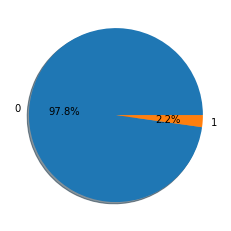

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


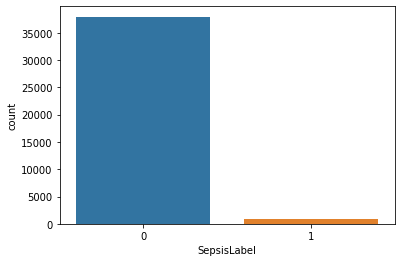

In [6]:
plt.pie(dataset['SepsisLabel'].value_counts(), labels=['0','1'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(dataset['SepsisLabel'], label="Count")
plt.show()

##### Resampling arrays or sparse matrices in a consistent way.

In [7]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

The resample() function is used to resample time-series data.

In [8]:
df_minority_upsampled = resample(df_minority,replace=True, n_samples=37945, random_state=123)

#### Concating majority and minority dataframe as one dataset 

In [9]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [11]:
df_upsampled.SepsisLabel.value_counts()

0    37945
1    37945
Name: SepsisLabel, dtype: int64

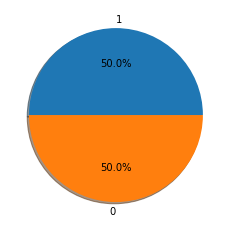

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


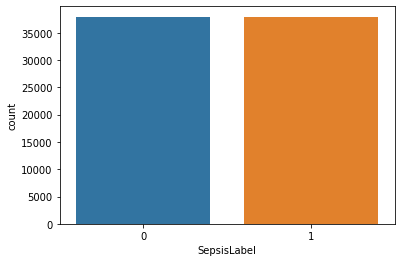

In [10]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(df_upsampled['SepsisLabel'], label="Count")
plt.show()

#### Feature Selection

In [11]:
X = df_upsampled[df_upsampled.columns[0:40]].values

Target Variable

In [12]:
Y = df_upsampled[df_upsampled.columns[40:]].values

Dimensions of sepsis dataset

In [13]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (75890, 41)


Dimensions of sepsis dataset without label column

In [14]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (75890, 40)


Dimensions of sepsis dataset only with label column

In [15]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (75890, 1)


Normalizing labels

In [16]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Splitting data 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(60712, 40)
Testing data dimensions :(15178, 40)


# Comparing Machine Learning Algorithms Consistently

Machine learning algorithms used: 

1. MLP Classifier

2. AdaBoost Classifier

3. Random Forest Classifier

4. Linear Discriminant Analysis



In [20]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [21]:
classifiers = [MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=1000,
    learning_rate_init=1e-5,
    tol=1e-4,
),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('Accuracy Score')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier
Accuracy Score
Accuracy: 91.3757%
Log Loss: 0.2805840335836675


C:\Users\user\AppData\Local\Temp\ipykernel_11528\4282968159.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


AdaBoostClassifier
Accuracy Score
Accuracy: 79.8261%
Log Loss: 0.6731792683873679
GaussianNB
Accuracy Score
Accuracy: 57.7678%
Log Loss: 2.120984212868764


C:\Users\user\AppData\Local\Temp\ipykernel_11528\4282968159.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\user\AppData\Local\Temp\ipykernel_11528\4282968159.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


LinearDiscriminantAnalysis
Accuracy Score
Accuracy: 72.4074%
Log Loss: 0.5490759157904656


C:\Users\user\AppData\Local\Temp\ipykernel_11528\4282968159.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


#### Accuracy Score Graph 

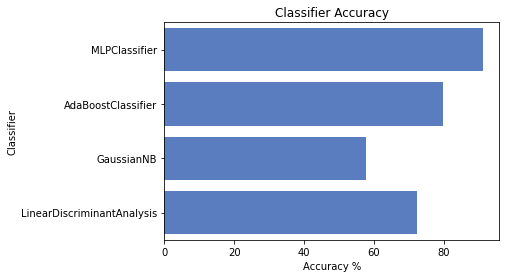

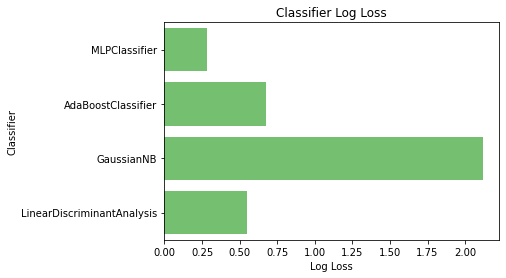

In [23]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

From the above scores we can conclude that the MLP classifier has got the maximum accuracy score that is around 81% and for further classification we will use only this alogorithm.